<a href="https://colab.research.google.com/github/Ignas12345/Magistro_projektas/blob/main/TCGA_duomenu_apdorojimas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [9]:
url = 'https://raw.githubusercontent.com/Ignas12345/Magistro_projektas/refs/heads/main/counts_combined.csv'
df = pd.read_csv(url)
df.head()

,miRNA_ID,read_count_TCGA-2G-AAG5-01A-11R-A439-13,read_count_TCGA-2G-AAG6-01A-11R-A439-13,read_count_TCGA-2G-AAGY-05A-11R-A439-13,read_count_TCGA-2G-AAGY-01A-11R-A439-13,read_count_TCGA-2G-AAGV-01A-11R-A439-13,read_count_TCGA-2G-AAGX-01A-11R-A439-13,read_count_TCGA-2G-AAFE-01A-11R-A439-13,read_count_TCGA-2G-AAGA-01A-11R-A439-13,read_count_TCGA-ZM-AA05-01A-12R-A43A-13,...,read_count_TCGA-WZ-A7V3-01A-11R-A43A-13,read_count_TCGA-2G-AAH3-01A-11R-A439-13,read_count_TCGA-4K-AA1I-01A-11R-A439-13,read_count_TCGA-S6-A8JX-01A-11R-A439-13,read_count_TCGA-SO-A8JP-01A-11R-A43A-13,read_count_TCGA-2G-AAFZ-01A-11R-A439-13,read_count_TCGA-XE-AANR-01A-11R-A43A-13,read_count_TCGA-XE-AAOJ-01A-12R-A43A-13,read_count_TCGA-2G-AAHG-01A-11R-A439-13,read_count_TCGA-2G-AAGP-01A-11R-A439-13
0,hsa-let-7a-1,98880,199771,14494,39072,127522,151508,40018,36309,62307,...,7584,30863,21545,7863,19993,60411,35383,33557,10810,70818
1,hsa-let-7a-2,98726,199757,14791,38979,126858,152317,39735,36097,61796,...,7509,30875,21129,8188,20023,60324,35142,33459,10725,70561
2,hsa-let-7a-3,99331,202322,14662,39183,128460,152572,40299,36326,62537,...,7638,30853,21440,8142,20107,60271,35164,33762,10830,71303
3,hsa-let-7b,144954,257771,15110,41688,108708,185933,41846,44154,49137,...,7979,38504,24463,17472,30699,57144,77662,34885,15229,95517
4,hsa-let-7c,107229,326967,2614,59663,479042,366449,6560,17224,5367,...,283,6766,4421,3387,4990,63271,29257,62214,3600,52257


In [10]:
df = df.drop(df.columns[0], axis=1)


In [17]:
full_data = df.to_numpy(dtype = np.int32)

In [19]:
print(full_data)
print(np.shape(full_data))

[[ 98880 199771  14494 ...  33557  10810  70818]
 [ 98726 199757  14791 ...  33459  10725  70561]
 [ 99331 202322  14662 ...  33762  10830  71303]
 ...
 [  1023   2244     63 ...   1010     50    552]
 [ 26826  88977    781 ...  15641   2606  13387]
 [396321 632648  41693 ... 719074  34287 254921]]
(1881, 139)


In [21]:
filtered_data = full_data[~np.all(full_data == 0, axis=1)]
print(np.shape(filtered_data))

(1546, 139)


In [24]:
print(filtered_data[:,0:6])

[[ 98880 199771  14494  39072 127522 151508]
 [ 98726 199757  14791  38979 126858 152317]
 [ 99331 202322  14662  39183 128460 152572]
 ...
 [  1023   2244     63    701    988    985]
 [ 26826  88977    781  16536 116413 101421]
 [396321 632648  41693 345710 597186 540734]]


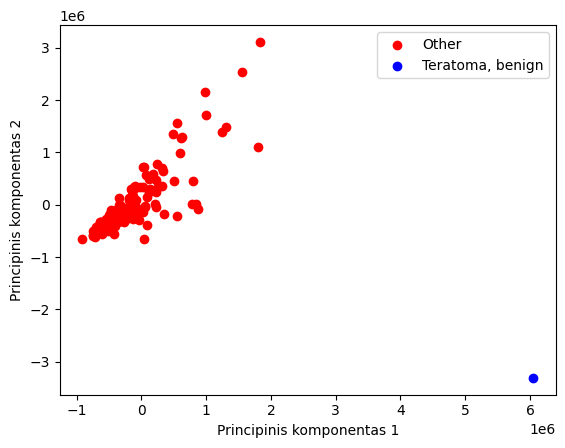

In [34]:
#duomenu "suplokstinimas"/vizualizacija naudojantis principine komponentu analize (PCA)
pca = PCA(n_components=15)
pca_data = pca.fit_transform(filtered_data.T)

plt.scatter(pca_data[6:139, 0], pca_data[6:139, 1], c = 'r', label = 'Other')
plt.scatter(pca_data[4, 0], pca_data[4, 1], c = 'b', label = 'Teratoma, benign')
plt.xlabel('Principinis komponentas 1')
plt.ylabel('Principinis komponentas 2')
plt.legend()
plt.show()

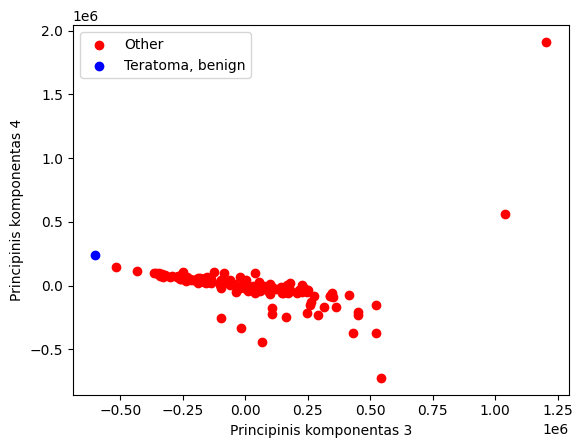

In [33]:
plt.scatter(pca_data[6:139, 3], pca_data[6:139, 4], c = 'r', label = 'Other')
plt.scatter(pca_data[4, 3], pca_data[4, 4], c = 'b', label = 'Teratoma, benign')
plt.xlabel('Principinis komponentas 3')
plt.ylabel('Principinis komponentas 4')
plt.legend()
plt.show()